In [31]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random


In [32]:
b# import data from file
file_name = '../data/demo_with_intersection.csv'
road = pd.read_csv(file_name)

In [78]:
roads= road['road'].unique()
roads

for road in roads:
    print(road)

N1
N102
N104
N105
N106
N2
N204
N207
N208


In [33]:
road.head()

,road,id,model_type,name,lat,lon,length,condition,road_lrp
0,N1,N1_0,sourcesink,Start of Road after Jatrabari Flyover infront...,23.706028,90.443333,0.0,NaN,N1LRPS
1,N1,N1_1,link,Km post missing,23.702139,90.451972,1.0,NaN,N1LRP001
2,N1,N1_2,bridge,.,23.698739,90.458861,0.8,A,N1LRP001a
3,N1,N1_3,link,Km post missing,23.697889,90.460583,0.2,NaN,N1LRP002
4,N1,N1_4,link,Km post missing,23.693833,90.469138,1.0,NaN,N1LRP003


In [38]:
# create the dataframe for the road only contains N1
road_N1 = road[road['road'] == 'N1']

In [73]:
# create the dataframe for the road only contains both N1 and N102
road_N1_N102 = road[road['road'].isin(['N1', 'N102'])]

In [68]:
def find_shortest_path_from_sourcesink(df):
    """
    Finds and visualizes the shortest path between two randomly selected 'sourcesink' nodes in a given road network.
 
    """
    # Create a directed graph
    G = nx.Graph()

    # Add nodes: Each road segment (lat, lon) becomes a node
    for _, row in df.iterrows():
        G.add_node(row['id'], pos=(row['lon'], row['lat']), model_type=row['model_type'])

    # Add edges based on road connectivity
    for i in range(len(df) - 1):
        if df.loc[i, 'road'] == df.loc[i + 1, 'road']:  # Ensure edges are within the same road
            G.add_edge(df.loc[i, 'id'], df.loc[i + 1, 'id'], weight=df.loc[i, 'length'])

    # Extract node positions for visualization
    pos = nx.get_node_attributes(G, 'pos')

    # print number of nodes and edges
    print("Number of nodes: ", G.number_of_nodes())
    print("Number of edges: ", G.number_of_edges())

    # Filter for nodes where 'model_type' is 'sourcesink'
    sourcesink_nodes = df[df['model_type'] == 'sourcesink']['id'].tolist()
    print("Sourcesink nodes: ", sourcesink_nodes)

    # Randomly select two distinct sourcesink nodes
    if len(sourcesink_nodes) >= 2:
        source, sink = random.sample(sourcesink_nodes, 2)  # Pick two distinct nodes
        print(f"Source node: {source}, Sink node: {sink}")
    else:
        print("Not enough 'sourcesink' nodes available for shortest path calculation.")
        return

    # Compute the shortest path using road length as weight
    shortest_path = nx.shortest_path(G, source, sink, weight='weight')

    # Draw the full network
    plt.figure(figsize=(10, 7))
    nx.draw(G, pos, with_labels=False, node_color='orange', edge_color='gray', node_size=5, font_size=8)

    # Highlight the shortest path
    path_edges = list(zip(shortest_path, shortest_path[1:]))  # Convert path nodes into edges
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)

    # Show edge labels (road segment lengths)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    #nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)

    # Display the graph
    plt.title(f"Shortest Path from {source} to {sink}")
    plt.show()

    # Print the shortest path
    print(f"Shortest path from {source} to {sink}: {shortest_path}")

Number of nodes:  1087
Number of edges:  1086
Sourcesink nodes:  ['N1_0', 'N1_1086']
Source node: N1_0, Sink node: N1_1086


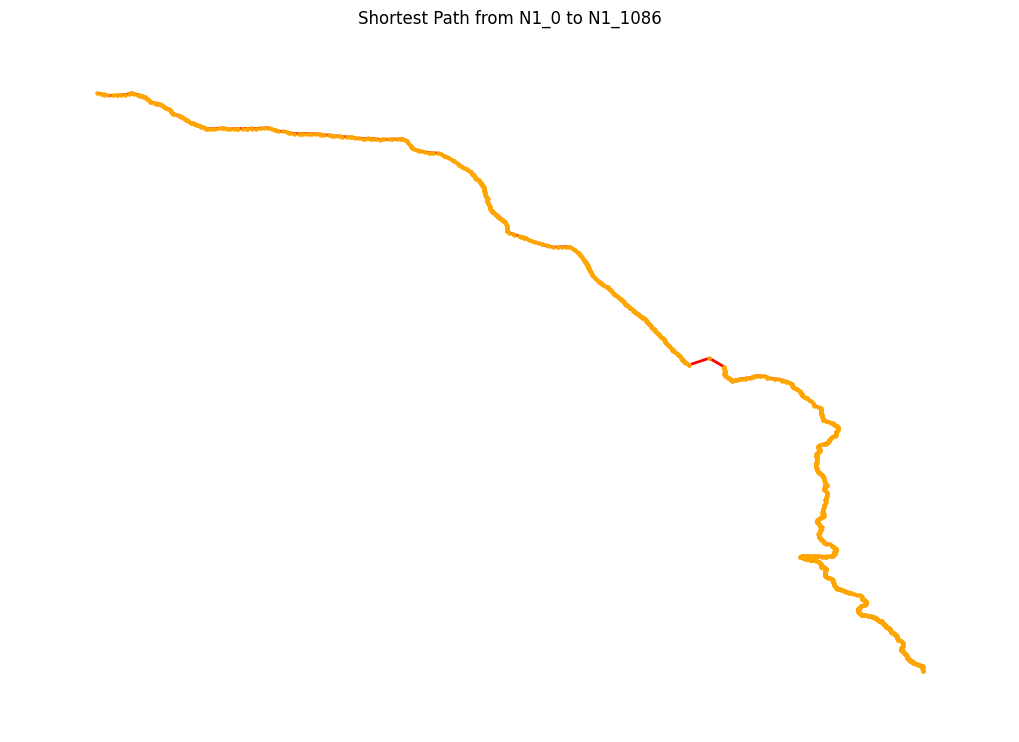

Shortest path from N1_0 to N1_1086: ['N1_0', 'N1_1', 'N1_2', 'N1_3', 'N1_4', 'N1_5', 'N1_6', 'N1_7', 'N1_8', 'N1_9', 'N1_10', 'N2_1N1_11', 'N1_12', 'N1_13', 'N1_14', 'N1_15', 'N1_16', 'N1_17', 'N1_18', 'N1_19N105_2', 'N1_20', 'N1_21', 'N1_22', 'N1_23', 'N1_24', 'N1_25', 'N1_26', 'N1_27', 'N1_28', 'N1_29', 'N1_30', 'N1_31', 'N1_32', 'N1_33', 'N1_34', 'N1_35', 'N1_36', 'N1_37', 'N1_38', 'N1_39', 'N1_40', 'N1_41', 'N1_42', 'N1_43', 'N1_44', 'N1_45', 'N1_46', 'N1_47', 'N1_48', 'N1_49', 'N1_50', 'N1_51', 'N1_52', 'N1_53', 'N1_54', 'N1_55', 'N1_56', 'N1_57', 'N1_58', 'N1_59', 'N1_60', 'N1_61', 'N1_62', 'N1_63', 'N1_64', 'N1_65', 'N1_66', 'N1_67', 'N1_68', 'N1_69', 'N1_70', 'N1_71', 'N1_72', 'N1_73', 'N1_74', 'N1_75', 'N1_76', 'N1_77', 'N1_78', 'N1_79', 'N1_80', 'N1_81', 'N1_82', 'N1_83', 'N1_84', 'N1_85', 'N1_86', 'N1_87', 'N1_88', 'N1_89', 'N1_90', 'N1_91', 'N1_92', 'N1_93', 'N1_94', 'N1_95', 'N1_96', 'N1_97', 'N1_98', 'N1_99', 'N1_100', 'N1_101', 'N1_102', 'N1_103', 'N1_104', 'N1_105', 'N1

In [65]:
find_shortest_path_from_sourcesink(road_N1)

Number of nodes:  2715
Number of edges:  2719
Sourcesink nodes:  ['N1_0', 'N1_1086', 'N102_0', 'N102_173', 'N104_0', 'N104_90', 'N105_0', 'N105_92', 'N106_0', 'N106_173', 'N2_0', 'N2_751', 'N204_0', 'N204_69', 'N207_0', 'N207_136', 'N208_0', 'N208_149']
Source node: N2_0, Sink node: N1_1086


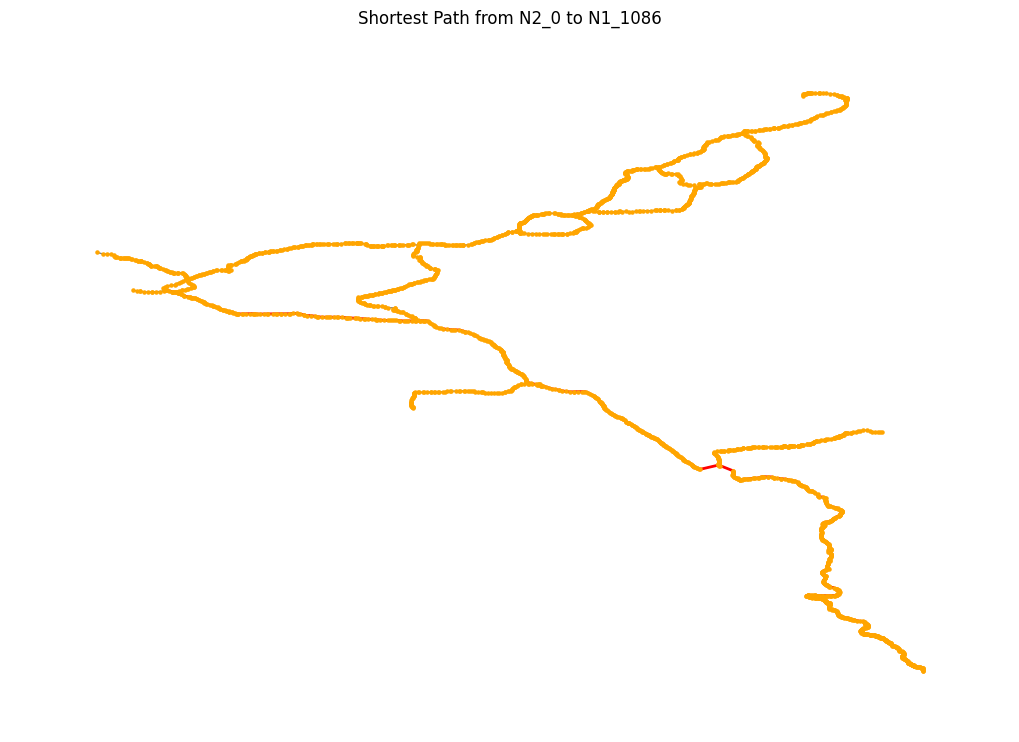

Shortest path from N2_0 to N1_1086: ['N2_0', 'N2_1N1_11', 'N1_12', 'N1_13', 'N1_14', 'N1_15', 'N1_16', 'N1_17', 'N1_18', 'N1_19N105_2', 'N1_20', 'N1_21', 'N1_22', 'N1_23', 'N1_24', 'N1_25', 'N1_26', 'N1_27', 'N1_28', 'N1_29', 'N1_30', 'N1_31', 'N1_32', 'N1_33', 'N1_34', 'N1_35', 'N1_36', 'N1_37', 'N1_38', 'N1_39', 'N1_40', 'N1_41', 'N1_42', 'N1_43', 'N1_44', 'N1_45', 'N1_46', 'N1_47', 'N1_48', 'N1_49', 'N1_50', 'N1_51', 'N1_52', 'N1_53', 'N1_54', 'N1_55', 'N1_56', 'N1_57', 'N1_58', 'N1_59', 'N1_60', 'N1_61', 'N1_62', 'N1_63', 'N1_64', 'N1_65', 'N1_66', 'N1_67', 'N1_68', 'N1_69', 'N1_70', 'N1_71', 'N1_72', 'N1_73', 'N1_74', 'N1_75', 'N1_76', 'N1_77', 'N1_78', 'N1_79', 'N1_80', 'N1_81', 'N1_82', 'N1_83', 'N1_84', 'N1_85', 'N1_86', 'N1_87', 'N1_88', 'N1_89', 'N1_90', 'N1_91', 'N1_92', 'N1_93', 'N1_94', 'N1_95', 'N1_96', 'N1_97', 'N1_98', 'N1_99', 'N1_100', 'N1_101', 'N1_102', 'N1_103', 'N1_104', 'N1_105', 'N1_106', 'N1_107', 'N1_108', 'N1_109', 'N1_110', 'N1_111', 'N1_112', 'N1_113', 'N1_

In [75]:
find_shortest_path_from_sourcesink(road)